In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [2]:
# set figure size and figure format 

plt.rcParams['figure.figsize'] = [8, 6]
%config InlineBackend.figure_format = 'svg'

Following code for not to scroll figure, figure will be fixed in place.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# twitter archive master

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Correlation between retweet_count and favorite count

 The very first that I want to know is there any relation between number of time a tweet have been retweeted and the favorite count of that tweet. From the plot, it seems that there is a positive correlation between retweet count and favorite count. Most tweet retweeted less than twenty thousand times but there are tweet that retweeted more than even forty thousand times. On the other hand, most favorite count is less than fifty thousand and top few more than hundred thousand. I wonder which dog tweet gets most retweeted. So, I have filter and found the following doggo that retweeted more than eighty thousand times. 


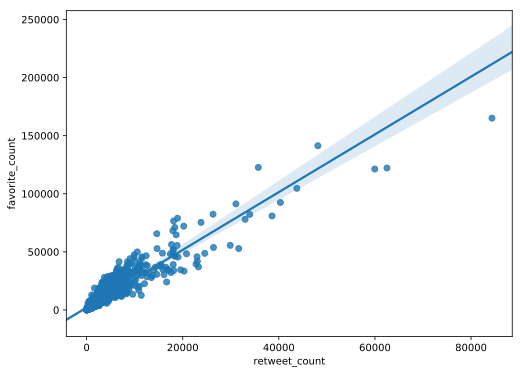

In [5]:
import warnings
warnings.filterwarnings('ignore')
tweet_fav = sns.regplot( data = twitter_archive_master, x = "retweet_count", y= "favorite_count");

In [6]:
twitter_archive_master.query('retweet_count > 80000')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
861,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,84351.0,165070.0


In [7]:
ret = twitter_archive_master.query('retweet_count > 80000')

In [8]:
ret.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/744234799360020481/video/1'],
      dtype=object)

  <img src="highestfav.jpg" style="width: 400px">

### Most Common Dog Name

Most common dog name is Lucy. So how about we find that how all lucy name dog tweet retweeted and how was favorite count. Luci did better than average in both retweet count and favorite count. The mean of retweet count for all dog is 2692.40 and mean for all lucy name dog is 3122.90. Mean for favorite count for all dog is 8713.20 and mean for all lucy name dog is 9865.81.



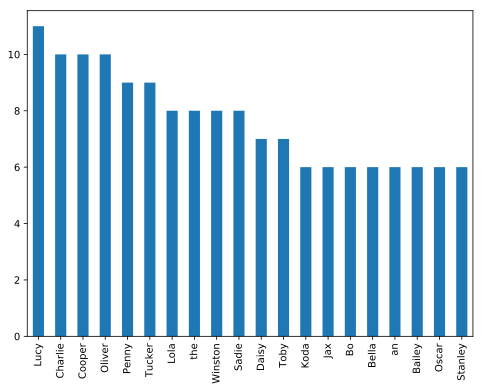

In [9]:
twitter_archive_master.name.value_counts().head(20).plot.bar(color = "#1f77b4");

In [10]:
retweet_lucy = twitter_archive_master.query('name == "Lucy"')

In [11]:
retweet_lucy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
251,837366284874571778,2017-03-02 18:17:34,Twitter for iPhone,This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,13,10,Lucy,NaN,5727.0,22291.0
257,836260088725786625,2017-02-27 17:01:56,Twitter for iPhone,This is Lucy. She spent all morning overseeing...,https://twitter.com/dog_rates/status/836260088...,13,10,Lucy,NaN,4639.0,22445.0
547,788908386943430656,2016-10-20 01:03:11,Twitter for iPhone,"This is Lucy. She destroyed not one, but two r...",https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,NaN,13713.0,29539.0
564,785927819176054784,2016-10-11 19:39:28,Twitter for iPhone,This is Lucy. She's strives to be the best pot...,https://twitter.com/dog_rates/status/785927819...,12,10,Lucy,NaN,3496.0,12234.0
804,749774190421639168,2016-07-04 01:17:51,Twitter for iPhone,This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12,10,Lucy,NaN,1420.0,4928.0
1001,719339463458033665,2016-04-11 01:41:07,Twitter for iPhone,Say hello to Lucy and Sophie. They think they'...,https://twitter.com/dog_rates/status/719339463...,10,10,Lucy,NaN,1339.0,4642.0
1094,708853462201716736,2016-03-13 03:13:29,Vine - Make a Scene,This is Lucy. She doesn't understand fetch. 8/...,https://vine.co/v/iHl2UDEBZ95,8,10,Lucy,NaN,704.0,1892.0
1144,705970349788291072,2016-03-05 04:17:02,Twitter for iPhone,This is Lucy. She's a Venetian Kerploof. Suppo...,https://twitter.com/dog_rates/status/705970349...,12,10,Lucy,NaN,956.0,3308.0
1180,702684942141153280,2016-02-25 02:42:00,Twitter for iPhone,This is Lucy. She's sick of these bullshit gen...,https://twitter.com/dog_rates/status/702684942...,11,10,Lucy,NaN,1160.0,3397.0
1355,689623661272240129,2016-01-20 01:41:08,Twitter for iPhone,This is Lucy. She's terrified of the stuffed b...,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,pupper,694.0,2360.0


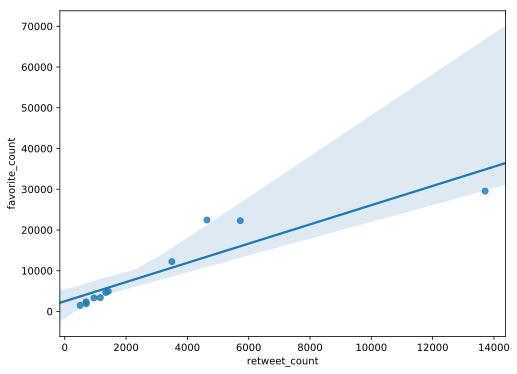

In [12]:
sns.regplot(data = retweet_lucy, x = 'retweet_count', y = 'favorite_count');

In [13]:
twitter_archive_master['retweet_count'].mean()

2692.402777777778

In [14]:
retweet_lucy['retweet_count'].mean()

3122.909090909091

In [15]:
twitter_archive_master['favorite_count'].mean()

8713.209722222222

In [16]:
retweet_lucy['favorite_count'].mean()

9865.818181818182

### Most Common Numerator Used to Rate the Dog

Most common numerator used to rate the dogs is 12. And most common denominator used is 10. I have filter out numerator and denominator that is more than 19 during data cleaning process. Because some value is insanely high and I have use 19 as a cut point. Form this data I have found a dog that is highest rated and this dog rated 17 out of 10. In the tweet text, it has been explained that this rate is just an emotional impulse, actually it would like 13 out of 10. This tweet was about group of dogs. I have not found the url but text says “These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s”.  interestingly it was only retweeted seven times favorite count was one hundred and  twenty five.


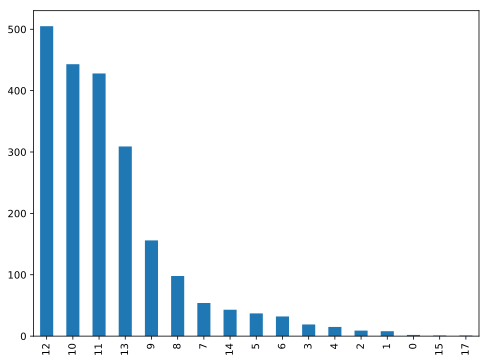

In [17]:
twitter_archive_master.rating_numerator.value_counts().plot(kind = 'bar', color = "#1f77b4");

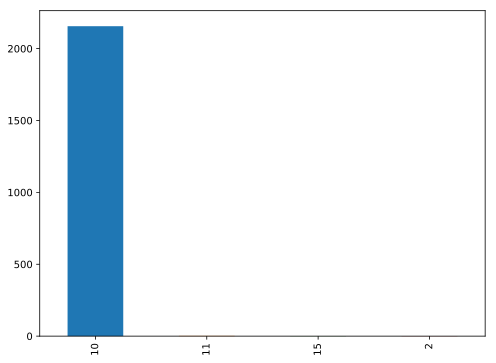

In [18]:
twitter_archive_master.rating_denominator.value_counts().plot(kind = 'bar');

In [19]:
tweet_17 = twitter_archive_master.query('rating_numerator > 15')

In [20]:
tweet_17

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
52,881633300179243008,2017-07-02 21:58:53,Twitter for iPhone,@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,NaN,NaN,7.0,125.0


In [21]:
tweet_17.text.unique()

array(['@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'],
      dtype=object)

### Common Dog Stages

From the plot, we see that the most common dog stage is pupper. Out of 2160 observation there is only 355 observation have entry for dog stage though. So, this plot might not be the actual representation of dog stage. 


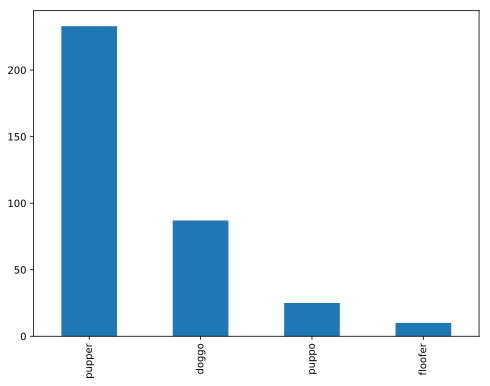

In [22]:
twitter_archive_master.dog_stages.value_counts().plot(kind = 'bar', color = "#1f77b4");

In [23]:
twitter_archive_master.dog_stages.count()

355

In [24]:
twitter_archive_master.tweet_id.count()

2160